## Fashion MNSIT
[](https://github.com/zalandoresearch/fashion-mnist)

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# OR 

In [5]:
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [6]:
print(test_images.shape)
print(test_labels.shape)


(10000, 28, 28)
(10000,)


Ankle Boot


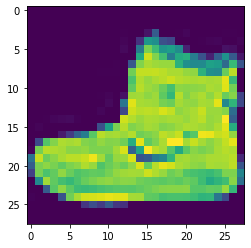

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[0])
print('Ankle Boot')


![./image/rawboot.png](./image/rawboot.png)

# Convolution 

![./image/convolution.png](./image/convolution.png)

![./image/conv1.png](./image/conv1.png)

![./image/filter1.png](image/filter1.png)

# Pooling 

![image.png](image/MaxPooling.png)

### Creating the first convolution Layer Model

In [9]:

model = keras.Sequential([
    
    # Add a 2D Convolution Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),

    # Adding the Max pooling Layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Add a 2D Convolution Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Adding the Max pooling Layer
    tf.keras.layers.MaxPooling2D(2,2),

    # Input Layer : Number of Neurons equal to the nunmber of input pixedl in an image
    keras.layers.Flatten(),

    # Hidden Layer
    keras.layers.Dense(128 , activation=tf.nn.relu),
    
    # Output Layer number of Neurons equals to number of output variables    
    keras.layers.Dense(10 , activation=tf.nn.softmax)

])

## First Convolution and Pooling Layer reducing the size of the image to a quarter 



In [10]:
# Add a 2D Convolution Layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),

# We use 64 filters of shape (3,3) these are from a pre seleted pool of filters to give good performance and 
# input_shape=(28, 28) pixel  and 1 as the image is in one color in this case gray scale 

(<tensorflow.python.keras.layers.convolutional.Conv2D at 0x151ac1fd0>,)

In [11]:
# Adding the Max pooling Layer to reduce the size of the image to a quarter
tf.keras.layers.MaxPooling2D(2, 2),


(<tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x13bf3fb00>,)

## Second Convolution and Pooling Layer 
Reducing the size of the image to a quarter again essentially compressing the image to 1/16 of the original size



In [12]:
# Add a 2D Convolution Layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# Adding the Max pooling Layer
tf.keras.layers.MaxPooling2D(2,2),


(<tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x13bf3f518>,)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## model.summary()

### For Conv Layers:

output_channels * (input_channels * window_size + 1) == number_parameters   
(64 x ( 3 x 3 + 1))   
11 x ( 3 x 3 + 1))   

### For Dense Layers:

output_size * (input_size + 1) == number_parameters   
* 128 x (1600 + 1 )   
* 10 x (128 + 1) 